In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/kaggle/input/heart-attack-in-china-youth-vs-adult/heart_attack_china_youth_vs_adult.csv")

In [3]:
df.head()

,ID,Age,Gender,Heart_Attack,Blood_Pressure,Cholesterol,Diabetes,Smoking,Alcohol_Consumption,Exercise_Level,...,Medication,Hypertension,Heart_Rate,Physical_Activity_Hours,Dietary_Fiber_Intake,Sodium_Intake,Cultural_Background,Genetic_Risk_Score,Age_Group,Screen_Time
0,1,50,Female,No,147.978602,215.563010,No,No,Moderate,Low,...,No,No,59.022408,0.566953,37.073115,2278.711795,Han,0.874595,Adult,8.294082
1,2,40,Female,No,119.558478,210.308676,No,Yes,NaN,Low,...,No,No,76.564803,1.384155,35.724646,2284.789866,Han,0.643054,Adult,4.593150
2,3,26,Female,No,102.617993,241.415264,No,No,Heavy,Low,...,No,No,88.519388,0.279997,20.102873,2179.251493,Other,0.715595,Adult,5.310293
3,4,54,Male,No,121.465827,252.900145,No,No,Moderate,High,...,No,Yes,68.676712,1.841346,32.476741,3022.112596,Han,0.658501,Adult,4.087884
4,5,19,Female,No,130.216946,164.222684,No,Yes,Heavy,Low,...,No,No,62.504824,1.088681,22.075720,3634.690298,Han,0.102311,Adult,6.533303


## Null Values Handling

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270000 entries, 0 to 269999
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       270000 non-null  int64  
 1   Age                      270000 non-null  int64  
 2   Gender                   270000 non-null  object 
 3   Heart_Attack             270000 non-null  object 
 4   Blood_Pressure           270000 non-null  float64
 5   Cholesterol              270000 non-null  float64
 6   Diabetes                 270000 non-null  object 
 7   Smoking                  270000 non-null  object 
 8   Alcohol_Consumption      135118 non-null  object 
 9   Exercise_Level           270000 non-null  object 
 10  BMI                      270000 non-null  float64
 11  Family_History           270000 non-null  object 
 12  Diet_Type                270000 non-null  object 
 13  Stress_Level             270000 non-null  float64
 14  Resi

In [5]:
df.isnull().sum()

ID                              0
Age                             0
Gender                          0
Heart_Attack                    0
Blood_Pressure                  0
Cholesterol                     0
Diabetes                        0
Smoking                         0
Alcohol_Consumption        134882
Exercise_Level                  0
BMI                             0
Family_History                  0
Diet_Type                       0
Stress_Level                    0
Residence                       0
Education_Level                 0
Employment_Status               0
Income_Level                    0
Marital_Status                  0
Sleep_Hours                     0
Medication                      0
Hypertension                    0
Heart_Rate                      0
Physical_Activity_Hours         0
Dietary_Fiber_Intake            0
Sodium_Intake                   0
Cultural_Background             0
Genetic_Risk_Score              0
Age_Group                       0
Screen_Time   

We find that the Alcohol_Consumption columns there is null values but it might indicates NO also lets check the unique values in that columns

In [6]:
df["Alcohol_Consumption"].unique()

array(['Moderate', nan, 'Heavy'], dtype=object)

So it is confirmed that the row which contains nan values nothing but it means no alcohol consumption we will impute this with No

In [7]:
df["Alcohol_Consumption"].replace(np.nan,"No",inplace=True)

## Columns overview

In [8]:
numeric_col = df.select_dtypes(include=[np.number])

In [9]:
categorical = df.select_dtypes(include="object")

In [10]:
categorical.columns

Index(['Gender', 'Heart_Attack', 'Diabetes', 'Smoking', 'Alcohol_Consumption',
       'Exercise_Level', 'Family_History', 'Diet_Type', 'Residence',
       'Education_Level', 'Employment_Status', 'Marital_Status', 'Medication',
       'Hypertension', 'Cultural_Background', 'Age_Group'],
      dtype='object')

In [11]:
for i in categorical.columns:
    print(df[i].value_counts(),"\n")

Gender
Female    129591
Male      129581
Other      10828
Name: count, dtype: int64 

Heart_Attack
No     238041
Yes     31959
Name: count, dtype: int64 

Diabetes
No     229461
Yes     40539
Name: count, dtype: int64 

Smoking
No     188792
Yes     81208
Name: count, dtype: int64 

Alcohol_Consumption
No          134882
Moderate    108097
Heavy        27021
Name: count, dtype: int64 

Exercise_Level
Moderate    135122
Low          80807
High         54071
Name: count, dtype: int64 

Family_History
No     202829
Yes     67171
Name: count, dtype: int64 

Diet_Type
Healthy      108123
Moderate     107760
Unhealthy     54117
Name: count, dtype: int64 

Residence
Urban    188637
Rural     81363
Name: count, dtype: int64 

Education_Level
Secondary    134853
Tertiary      80972
Primary       54175
Name: count, dtype: int64 

Employment_Status
Employed      189166
Student        53771
Unemployed     27063
Name: count, dtype: int64 

Marital_Status
Married     134948
Single      108068
Divorc

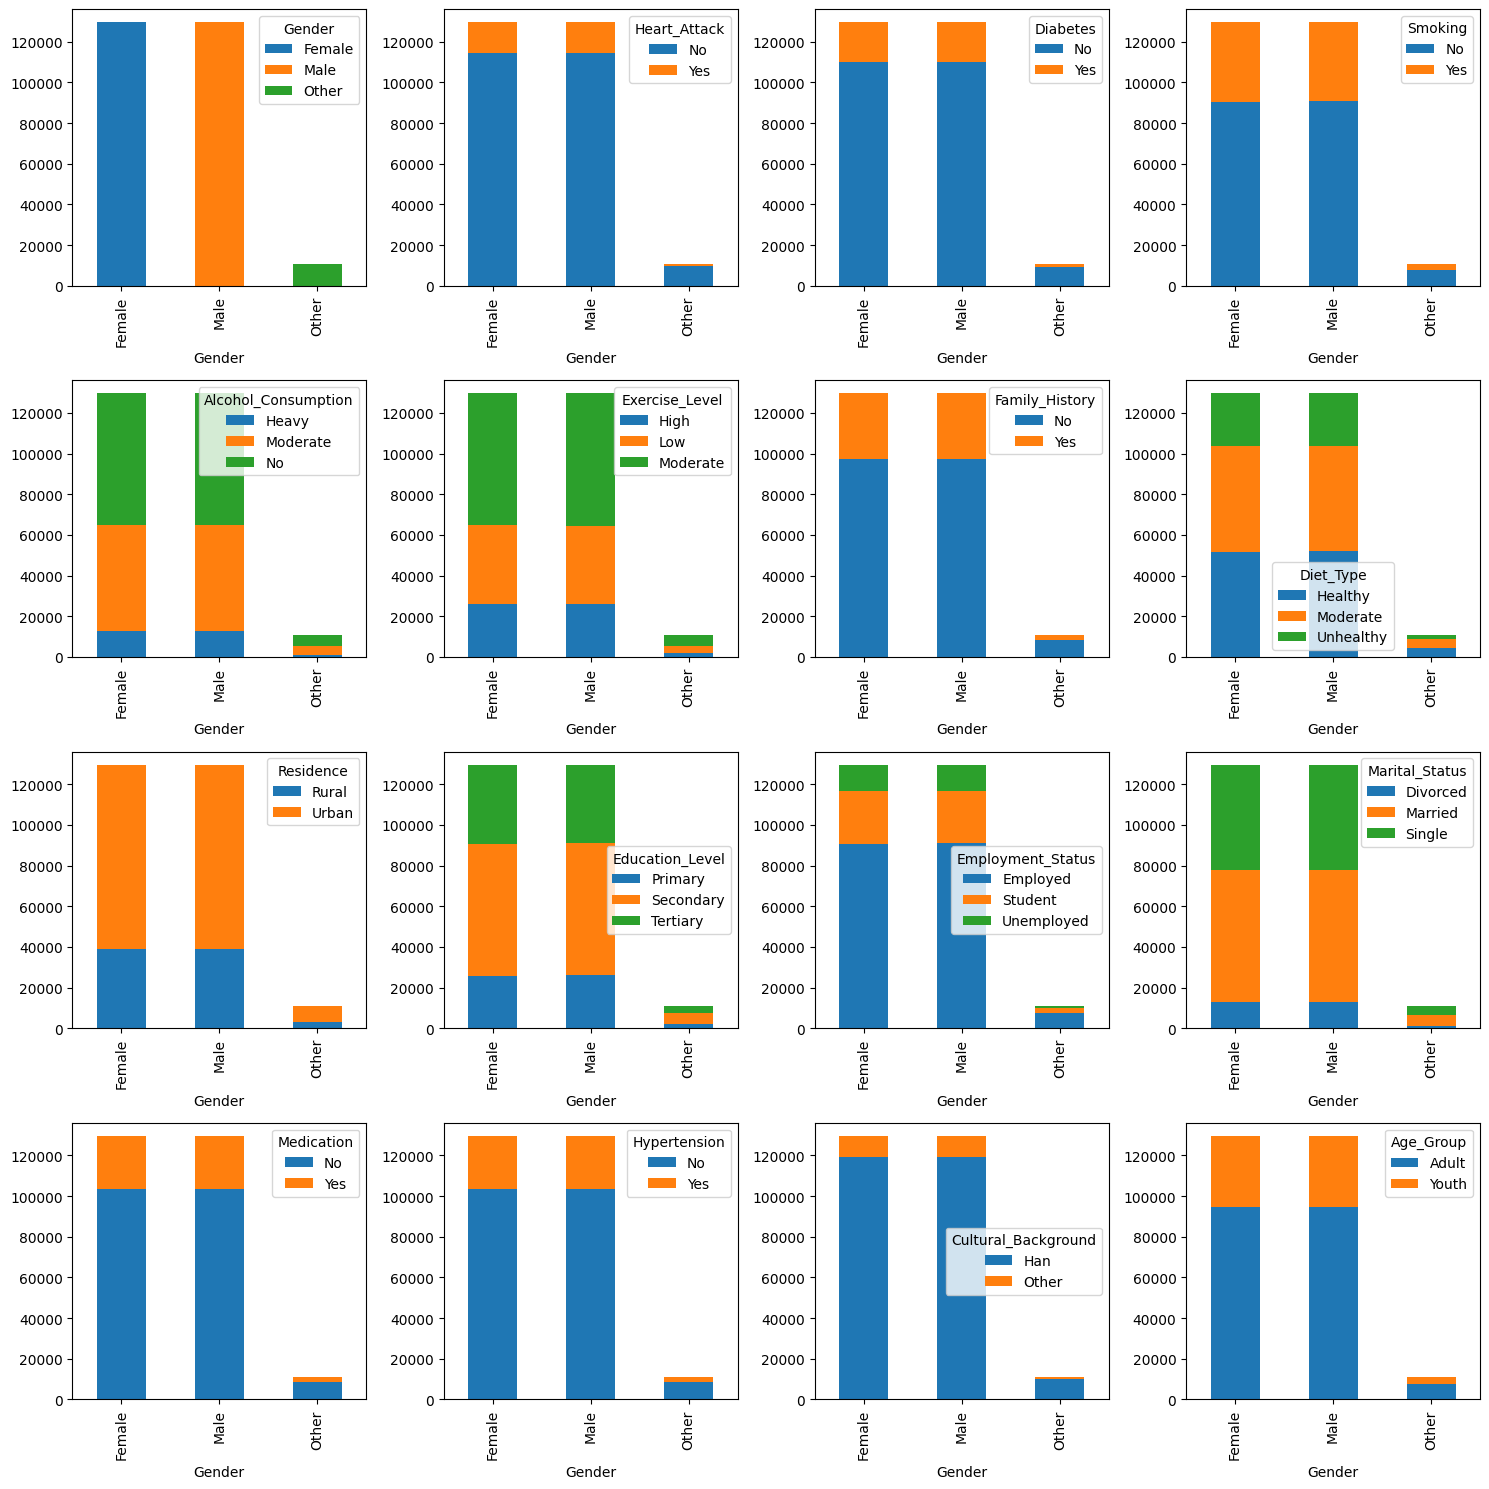

In [12]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical.columns):
    plt.subplot(4, 4, i+1)
    crosstab = pd.crosstab(df['Gender'], df[col])
    crosstab.plot(kind='bar', stacked=True, ax=plt.gca())
plt.tight_layout()
plt.show()  

* Gender: we can see that each male and female have almost same number of counts and other have very few count in thius data set
* Gender vs heart_attack: it can seen that the heart_attack is not common in china and it's case is very less according to the data but case number of cases for the male and female are same and there are few other which have almost negligible heart attack problem same trend follows for Gender vs Diabetes also
* Smoking vs Gender: there are not much but a considerable number of people who's smoke
* Gender vs Alcohol consumption: there are almost half of the population who dont consume alcohol and in another half of the population section there are is huge people who drinks moderately and some of the people is heavy drinker
* Exercise vs Gender: almost major portion of population do excercise which include the heavy to moderate level and few are less active in the excercising
* there are only few people who dont take the healthy meal otherwise there is a huge nuber of people who is taking a healthy diet which include the moderate to high level
* Gender vs residence: mojority of the population lives in the urban areas only very few lives in the rural area
* Education vs Gender: almost half of the population done have done their secondary education and very few are there who is done their primary educatin only
* Employment vs Gender: almost all population are employed and very few are there who is either student and non-employed people
* marital_status vs Gender: almost half the population are engaged and in another half only few are divoced and mojority are single
* Medication vs gender: very few population use medication
* hypertension vs Gender: there are vey less people who is tensed
* Cultural_background: almost majority population are han chiness
* Age_group: majority are adult only

lets just store the target variable separately and drop from the main data

In [13]:
df["Heart_Attack"].replace({"No": 0, "Yes": 1}, inplace=True)

In [14]:
y = df["Heart_Attack"]

In [15]:
df.drop(columns=["Heart_Attack"],inplace=True)

## Encoding

since there are no lots of data that is contain in the columns so will proceed with get_dummy fuction

lets drop the heart rate from the categorical as well

In [16]:
categorical.drop(columns=["Heart_Attack"],inplace=True)

In [17]:
dummies_list = []
for column in categorical:
    dummies = pd.get_dummies(df[column], drop_first=True)
    dummies_list.append(dummies)

In [18]:
df = pd.concat([df] + dummies_list, axis=1)


In [19]:
df.drop(columns=categorical, inplace=True)

In [20]:
df.shape

(270000, 36)

In [21]:
numeric_col.columns

Index(['ID', 'Age', 'Blood_Pressure', 'Cholesterol', 'BMI', 'Stress_Level',
       'Income_Level', 'Sleep_Hours', 'Heart_Rate', 'Physical_Activity_Hours',
       'Dietary_Fiber_Intake', 'Sodium_Intake', 'Genetic_Risk_Score',
       'Screen_Time'],
      dtype='object')

In [22]:
df.drop(columns=["ID"],inplace=True)

We drop ID column because it is of no use in our data analysis and algorithm execuation

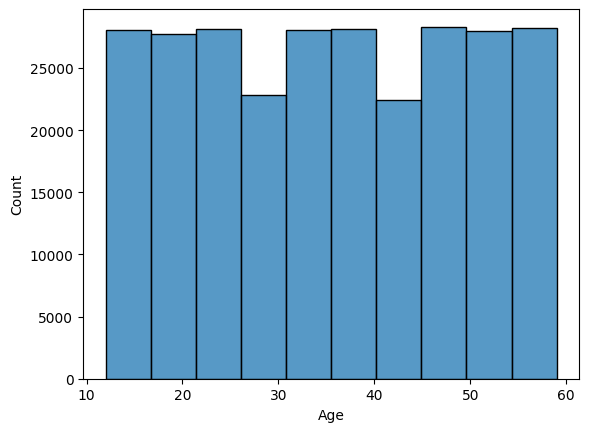

In [23]:
sns.histplot(x = df["Age"],data = df,bins=10)
plt.show()

this is very good because we have the data for the almost equal number of age groups

In [24]:
numeric_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270000 entries, 0 to 269999
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       270000 non-null  int64  
 1   Age                      270000 non-null  int64  
 2   Blood_Pressure           270000 non-null  float64
 3   Cholesterol              270000 non-null  float64
 4   BMI                      270000 non-null  float64
 5   Stress_Level             270000 non-null  float64
 6   Income_Level             270000 non-null  float64
 7   Sleep_Hours              270000 non-null  float64
 8   Heart_Rate               270000 non-null  float64
 9   Physical_Activity_Hours  270000 non-null  float64
 10  Dietary_Fiber_Intake     270000 non-null  float64
 11  Sodium_Intake            270000 non-null  float64
 12  Genetic_Risk_Score       270000 non-null  float64
 13  Screen_Time              270000 non-null  float64
dtypes: f

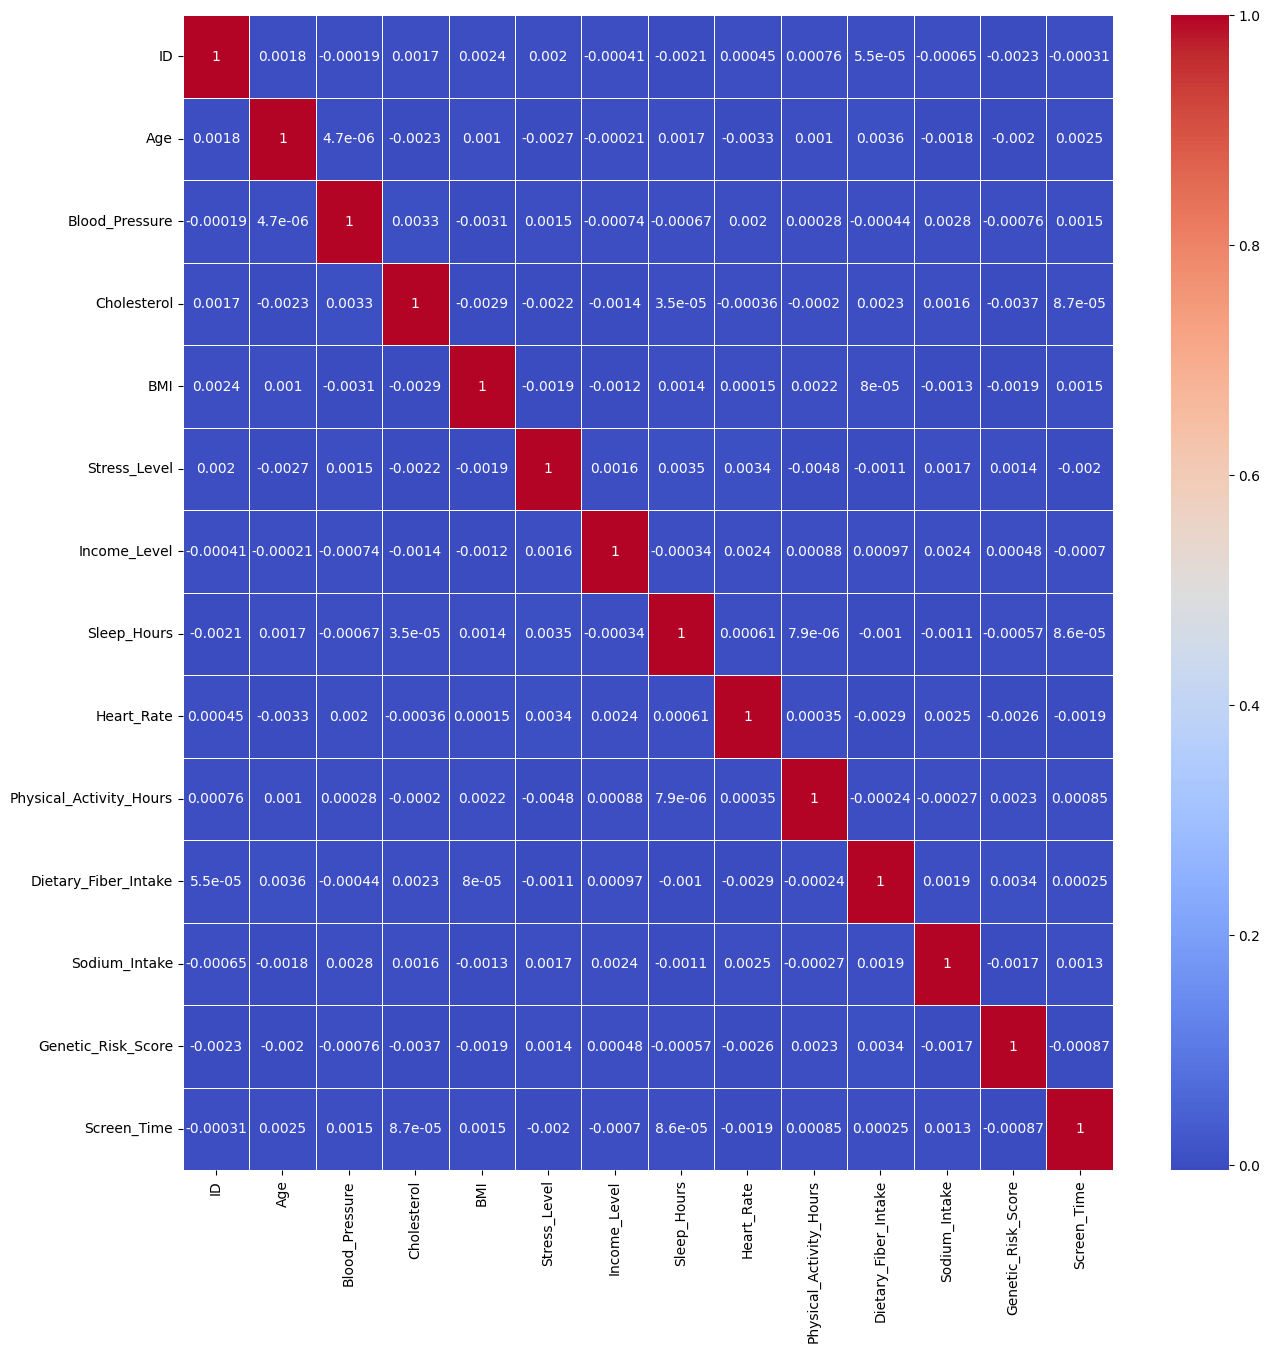

In [25]:
plt.figure(figsize=(15,15))
sns.heatmap(numeric_col.corr(),annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

data is not showing much correlation with each other so we can conclude from here that it is a purely classification problem

In [26]:
numeric_col.drop(columns=["ID"],inplace=True)

## Outlair Handling

In [27]:
numeric_col.describe()

,Age,Blood_Pressure,Cholesterol,BMI,Stress_Level,Income_Level,Sleep_Hours,Heart_Rate,Physical_Activity_Hours,Dietary_Fiber_Intake,Sodium_Intake,Genetic_Risk_Score,Screen_Time
count,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,2.700000e+05,270000.000000,270000.000000,2.700000e+05,270000.000000
mean,35.529578,120.011427,199.811608,24.002123,5.494007,49973.431199,7.001692,69.998095,1.000017e+00,27.497585,3499.973822,4.998383e-01,6.000168
std,13.843940,14.986193,50.114181,4.001107,2.600964,14989.098981,1.728794,10.004567,5.784219e-01,7.216701,865.523707,2.887596e-01,2.307593
min,12.000000,55.208028,-32.220939,5.498966,1.000024,-16132.519545,4.000046,24.715191,6.742417e-07,15.000031,2000.003049,9.163707e-07,2.000004
25%,24.000000,109.886192,166.007463,21.311917,3.242283,39824.425262,5.507812,63.229390,4.990790e-01,21.250607,2752.462561,2.496343e-01,4.003872
50%,36.000000,120.021793,199.883573,24.000820,5.486946,49933.777051,7.001573,69.996890,1.000097e+00,27.493316,3499.013926,5.000580e-01,5.999747
75%,48.000000,130.132059,233.594966,26.702422,7.739883,60041.583040,8.495028,76.746184,1.503240e+00,33.748186,4248.825415,7.498260e-01,8.001285
max,59.000000,190.184237,430.819196,41.180928,9.999991,120179.635203,9.999999,115.233492,1.999998e+00,39.999837,4999.990953,9.999982e-01,9.999998


In [28]:
numeric_col.shape

(270000, 13)

not much outlairs expected from the given data only few columns are there which contains outlairs

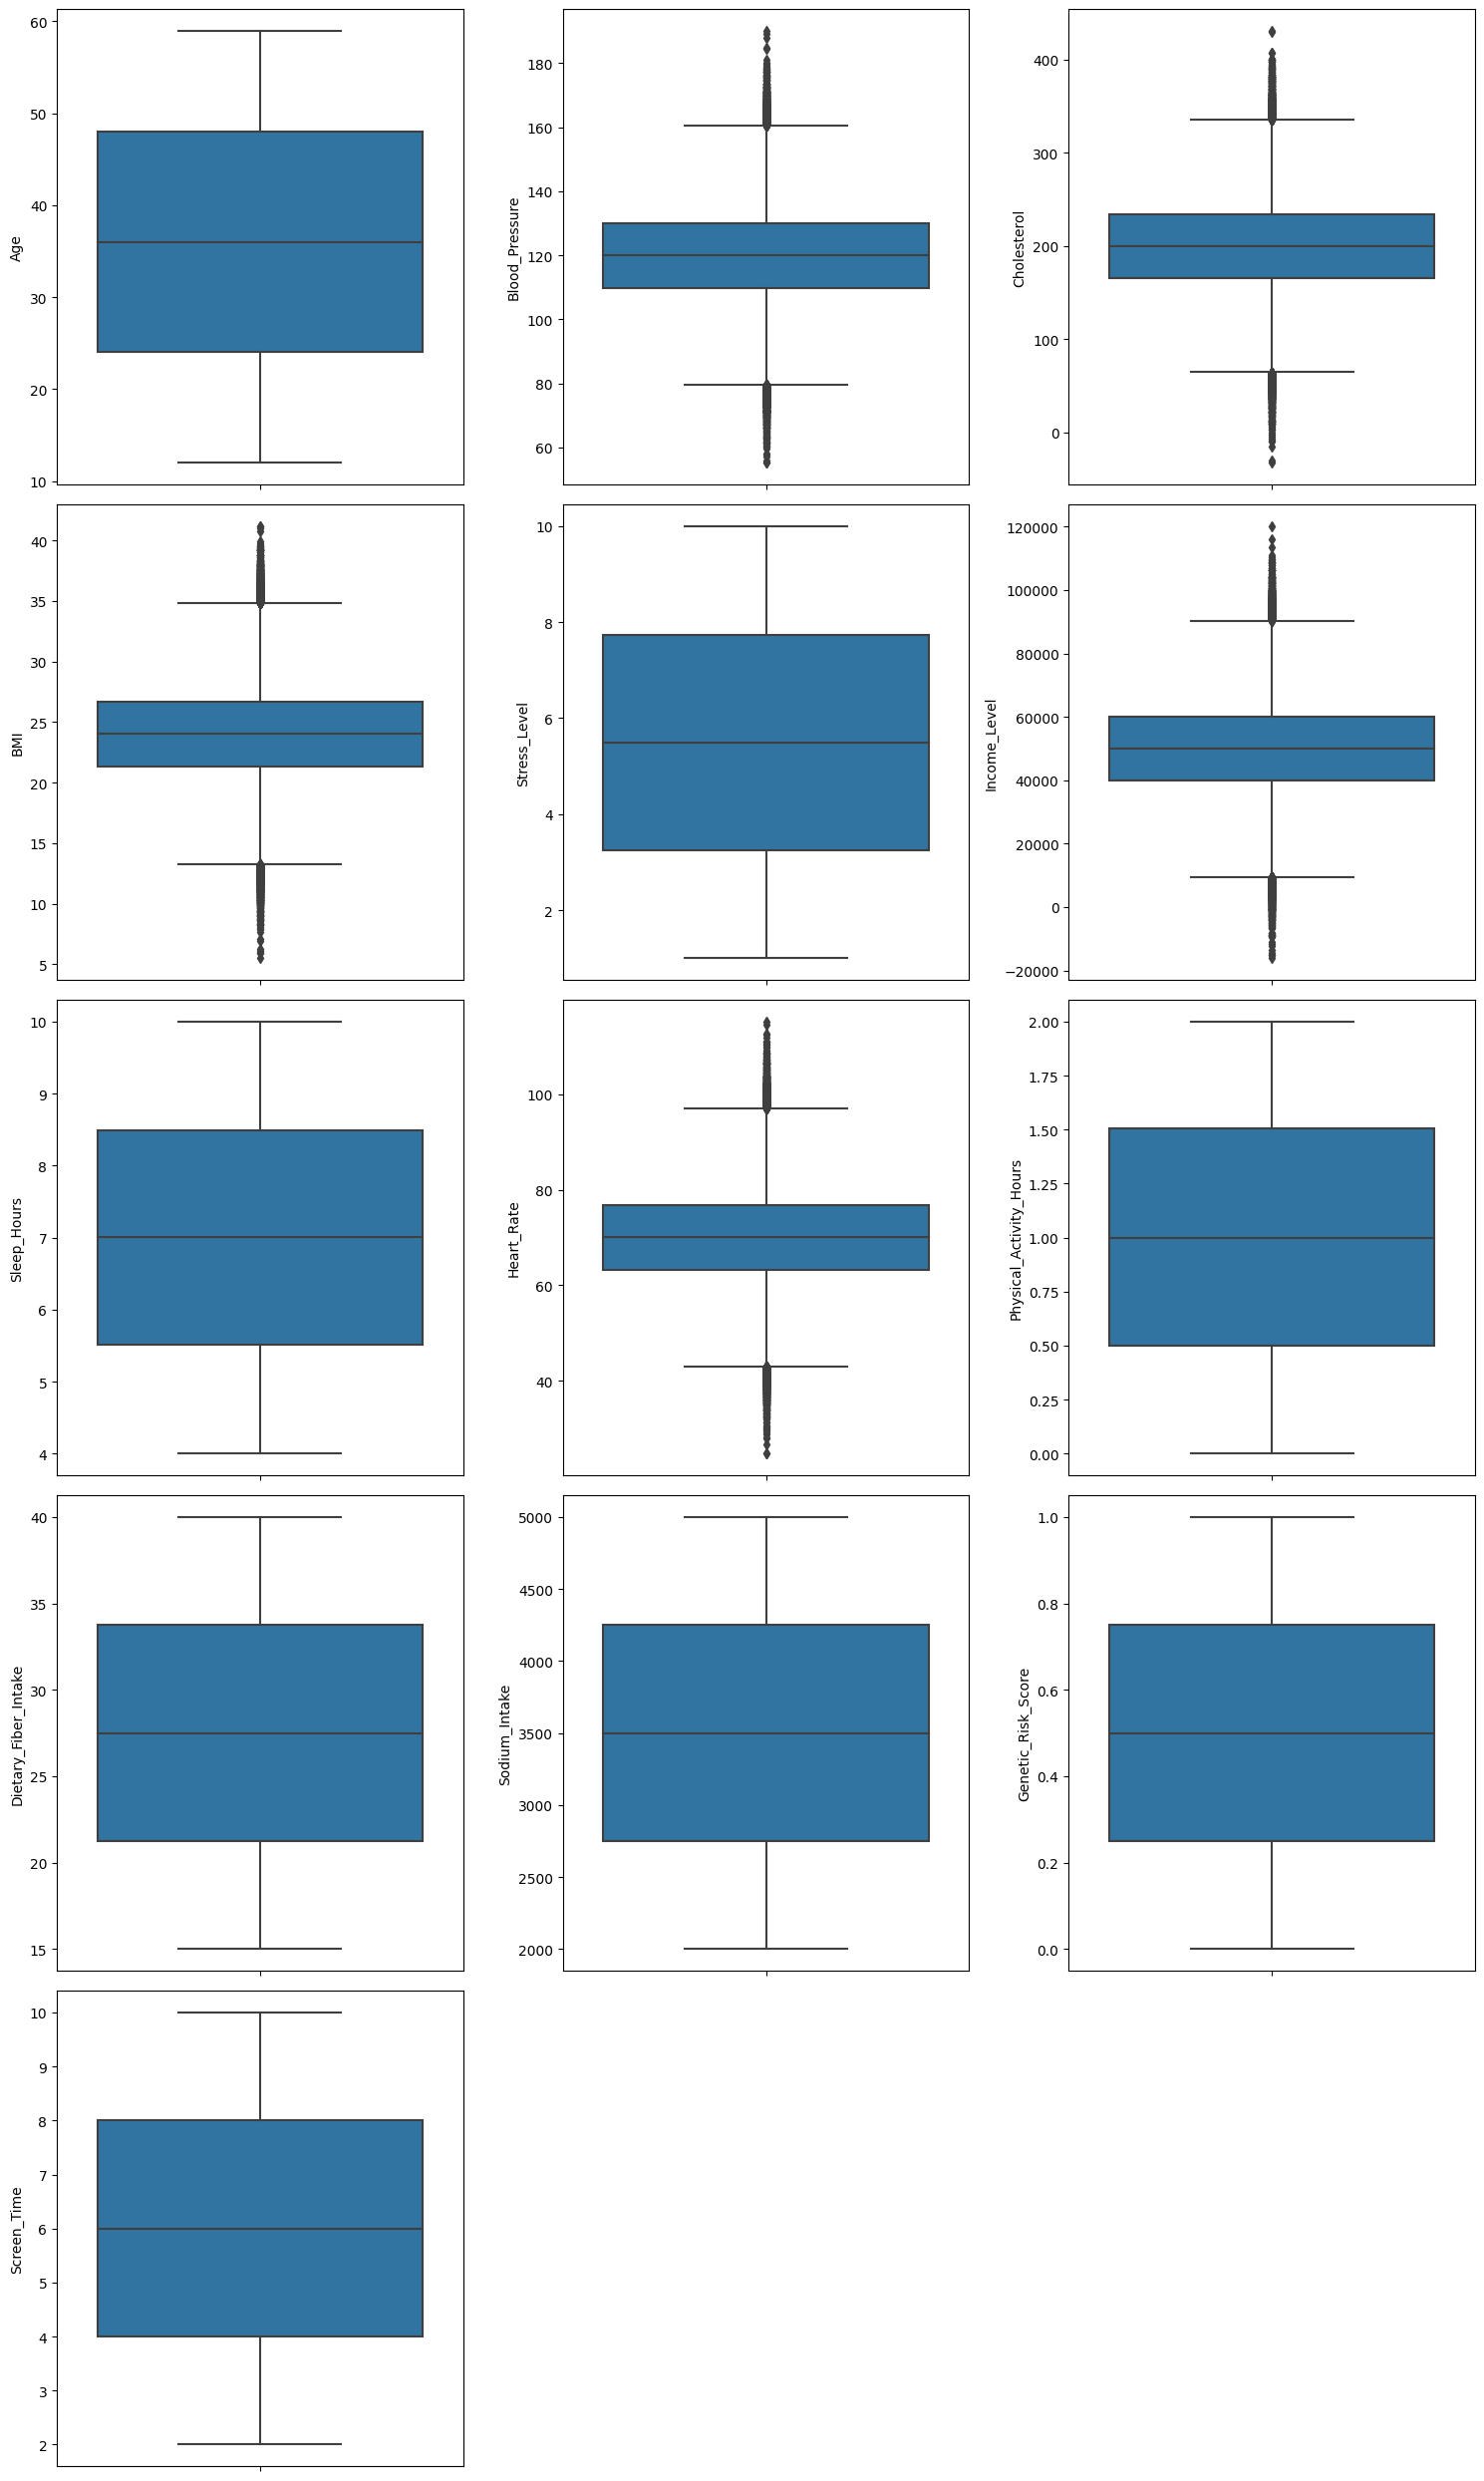

In [29]:
plt.figure(figsize=(15,25))
for i,col in enumerate(numeric_col.columns):
    plt.subplot(5,3,i+1)
    sns.boxplot(y=col,data=numeric_col)
    plt.tight_layout()
plt.show()

there are not much outlairs in the data so we can neglect it if needed in the future we will remove this using IQR method

## Feature scaling

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
ss = StandardScaler()

In [32]:
numeric_col1 = pd.DataFrame(ss.fit_transform(numeric_col),columns=numeric_col.columns)

In [33]:
df.columns

Index(['Age', 'Blood_Pressure', 'Cholesterol', 'BMI', 'Stress_Level',
       'Income_Level', 'Sleep_Hours', 'Heart_Rate', 'Physical_Activity_Hours',
       'Dietary_Fiber_Intake', 'Sodium_Intake', 'Genetic_Risk_Score',
       'Screen_Time', 'Male', 'Other', 'Yes', 'Yes', 'Moderate', 'No', 'Low',
       'Moderate', 'Yes', 'Moderate', 'Unhealthy', 'Urban', 'Secondary',
       'Tertiary', 'Student', 'Unemployed', 'Married', 'Single', 'Yes', 'Yes',
       'Other', 'Youth'],
      dtype='object')

In [34]:
df.drop(columns=numeric_col.columns,inplace=True)

In [35]:
df = pd.concat([df,numeric_col1],axis=1)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270000 entries, 0 to 269999
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Male                     270000 non-null  bool   
 1   Other                    270000 non-null  bool   
 2   Yes                      270000 non-null  bool   
 3   Yes                      270000 non-null  bool   
 4   Moderate                 270000 non-null  bool   
 5   No                       270000 non-null  bool   
 6   Low                      270000 non-null  bool   
 7   Moderate                 270000 non-null  bool   
 8   Yes                      270000 non-null  bool   
 9   Moderate                 270000 non-null  bool   
 10  Unhealthy                270000 non-null  bool   
 11  Urban                    270000 non-null  bool   
 12  Secondary                270000 non-null  bool   
 13  Tertiary                 270000 non-null  bool   
 14  Stud

since we are getting the some columns is in bool datatype we will that means for 0 value we are getting no and for 1 value we are getting yes

In [37]:
bool_cols = df.select_dtypes(include='bool').columns

In [38]:
bool_cols

Index(['Male', 'Other', 'Yes', 'Yes', 'Moderate', 'No', 'Low', 'Moderate',
       'Yes', 'Moderate', 'Unhealthy', 'Urban', 'Secondary', 'Tertiary',
       'Student', 'Unemployed', 'Married', 'Single', 'Yes', 'Yes', 'Other',
       'Youth'],
      dtype='object')

In [39]:
for col in bool_cols:
    df[col] = df[col].astype(int)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270000 entries, 0 to 269999
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Male                     270000 non-null  int64  
 1   Other                    270000 non-null  int64  
 2   Yes                      270000 non-null  int64  
 3   Yes                      270000 non-null  int64  
 4   Moderate                 270000 non-null  int64  
 5   No                       270000 non-null  int64  
 6   Low                      270000 non-null  int64  
 7   Moderate                 270000 non-null  int64  
 8   Yes                      270000 non-null  int64  
 9   Moderate                 270000 non-null  int64  
 10  Unhealthy                270000 non-null  int64  
 11  Urban                    270000 non-null  int64  
 12  Secondary                270000 non-null  int64  
 13  Tertiary                 270000 non-null  int64  
 14  Stud

Now our columns become ready for the algorithm execuation since it is a very big data so we will try to use Tree algorithms or ensemble learning ANN 

## Train test split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test = train_test_split(df,y,test_size=0.2,random_state=42)

## Algorithm Execuation

#### Parameter tunning

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [44]:
input_dim = x_train.shape[1]

In [45]:
model = Sequential()

In [46]:
model.add(Dense(256,activation="relu",input_dim=input_dim))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Dense(64,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(1,activation="sigmoid"))

In [47]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [48]:
history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64
)

Epoch 1/100
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8142 - loss: 0.4654 - val_accuracy: 0.8839 - val_loss: 0.3607
Epoch 2/100
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8818 - loss: 0.3681 - val_accuracy: 0.8839 - val_loss: 0.3604
Epoch 3/100
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8813 - loss: 0.3668 - val_accuracy: 0.8839 - val_loss: 0.3594
Epoch 4/100
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8820 - loss: 0.3644 - val_accuracy: 0.8839 - val_loss: 0.3592
Epoch 5/100
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8815 - loss: 0.3646 - val_accuracy: 0.8839 - val_loss: 0.3592
Epoch 6/100
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8821 - loss: 0.3635 - val_accuracy: 0.8839 - val_loss: 0.3592
Epoch 7/100
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8824 - loss: 0.3625 - val_accuracy: 0.8839 - val_loss: 0.3592
Epoch 8/100
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8811 - loss: 

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf = RandomForestClassifier(max_depth = 20,n_estimators=200,random_state=42)

In [51]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

In [52]:
rf.score(x_test,y_test),rf.score(x_train,y_train)

(0.880962962962963, 0.8820925925925925)

In [53]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.3948
Test Accuracy: 0.8778


we can see that till some extent the ML performing well than DL

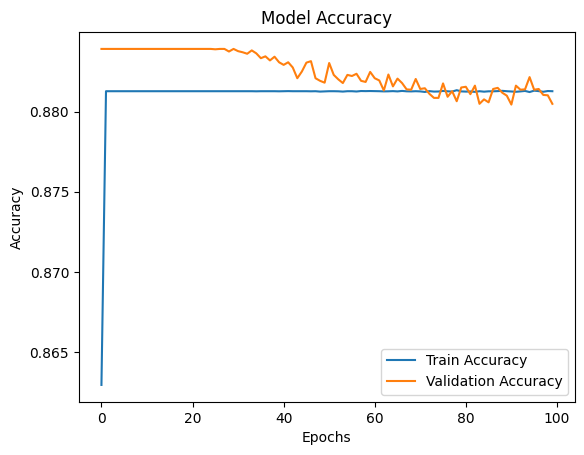

In [54]:
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We can see that clearly on every epochs model is not changed very much that means it has no effect on test and train accuracy

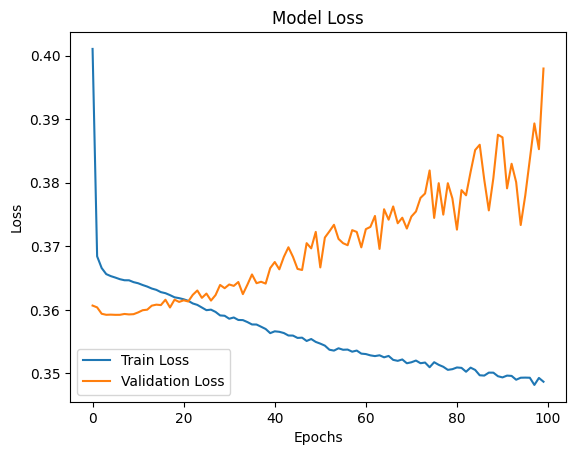

In [55]:
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

from this we conclude that model does not overfit

In [56]:
# Make predictions
y_pred = model.predict(x_test)

if y_pred.shape[1] == 1:
    y_pred_classes = (y_pred > 0.5).astype(int).flatten()
else:
    y_pred_classes = y_pred.argmax(axis=1)

if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test_classes = y_test.argmax(axis=1)
else:
    y_test_classes = y_test


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [58]:
# Compute confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

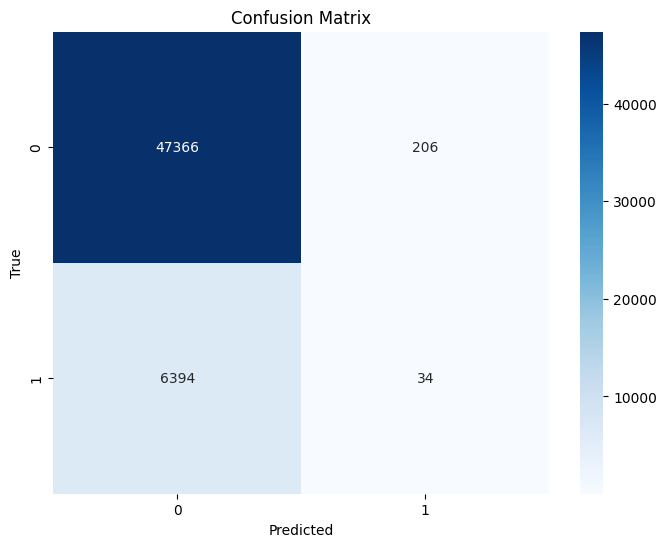

In [59]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_classes), yticklabels=np.unique(y_test_classes))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [60]:
cm1 = confusion_matrix(y_test,rf.predict(x_test))

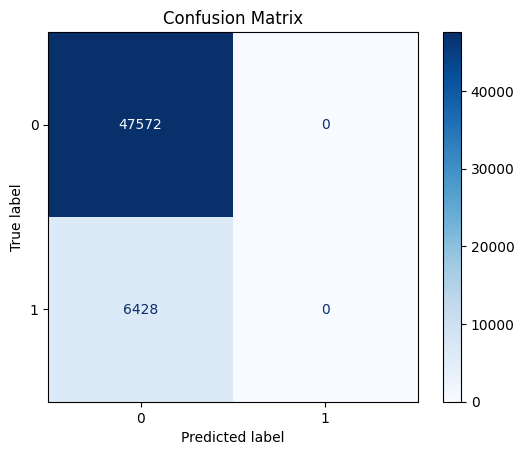

In [61]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=np.unique(y_test))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

conclusion after drawing the confussion matrix for both we have find that our DL model performing well than that of ML model